<a href="https://colab.research.google.com/github/blinov-89/Altai_II_LAMA_class/blob/main/AutoML_%D0%90%D0%BB%D1%82%D0%B0%D0%B8%CC%86_notebook_Multi_class_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install -U lightautoml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 319 kB 8.3 MB/s 
     |████████████████████████████████| 526 kB 69.7 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 804.1 MB 3.1 kB/s 
     |████████████████████████████████| 348 kB 59.3 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 215 kB 50.4 MB/s 
     |████████████████████████████████| 2.8 MB 47.2 MB/s 
     |████████████████████████████████| 209 kB 81.8 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
     |████████████████████████████████| 147 kB 59.0 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 112 kB 50.6 MB/s 
     |████████████████████████████████| 19.1 MB 1.0 MB/s 
     |███████████████████████████████

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
import torch

In [ ]:
import os

#autoML

In [ ]:
df_train = pd.read_csv('../input/train_dataset_train.csv')
df_test = pd.read_csv('../input/test_dataset_test.csv')

In [ ]:
df_train.Статус.value_counts()

 4    8249
 3    4721
-1     614
Name: Статус, dtype: int64

#train

In [ ]:
pd.set_option('display.max_columns', 100)
df_train.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Россия,Алтайский край,Алтайское с,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4


In [ ]:
df_test.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
0,64996,20608,2014,Жен,ДН,Английский язык,1995-11-03 00:00:00.000,"МБОУ ""СОШ №55""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,40.0,49.0
1,71837,20613,2015,Жен,ДН,Немецкий язык,1995-12-10 00:00:00.000,"МБОУ ""СОШ №1""","Алтайский край, Рубцовск г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,1.0,0.0,26.0,77.0
2,86587,21210,2018,Жен,ОО,Английский язык,1973-08-09 00:00:00.000,Алтайский государственный медицинский университет,"Алтайский край, г. Барнаул",1997.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,74.0


In [ ]:
train_ids = set(df_train['ID'].values)
test_ids = set(df_test['ID'].values)
train_ids.intersection(test_ids)

set()

In [ ]:
df_train['ID'].value_counts()

72716    1
83826    1
70095    1
88013    1
76114    1
        ..
48789    1
77819    1
70355    1
68700    1
80923    1
Name: ID, Length: 13584, dtype: int64

In [ ]:
df_test['ID'].value_counts()

64996    1
75444    1
75727    1
86588    1
71838    1
        ..
80217    1
71384    1
77897    1
55587    1
69975    1
Name: ID, Length: 6691, dtype: int64

In [ ]:
df_train.shape, df_test.shape

((13584, 24), (6691, 23))

In [ ]:
train_ids = set(df_train['Код_группы'].values)
test_ids = set(df_test['Код_группы'].values)
len(train_ids.intersection(test_ids)), len(train_ids)

2097

In [ ]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TIMEOUT = 8 * 3600 # equal to 8 hours
TARGET_NAME = 'Статус'

In [ ]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [ ]:
task = Task('multiclass', metric = 'crossentropy')

roles = {
    'target': TARGET_NAME,
    'drop': ['ID']
}

automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': 1, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
    #selection_params = {'mode': 0}
)

oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

[17:51:05] Stdout logging level is INFO3.
[17:51:05] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[17:51:05] Task: multiclass

[17:51:05] Start automl preset with listed constraints:
[17:51:05] - time: 28800.00 seconds
[17:51:05] - CPU: 8 cores
[17:51:05] - memory: 16 GB

[17:51:05] Train data shape: (13584, 24)

[17:51:05] Feats was rejected during automatic roles guess: []
[17:51:05] Layer 1 train process start. Time left 28799.18 secs


/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and wi

[17:51:06] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[17:51:06] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[17:51:06] Linear model: C = 1e-05 score = -0.6701621905045997
[17:51:06] Linear model: C = 5e-05 score = -0.553938386032209
[17:51:07] Linear model: C = 0.0001 score = -0.5103328488208422
[17:51:07] Linear model: C = 0.0005 score = -0.44280560271088465
[17:51:07] Linear model: C = 0.001 score = -0.42481285656378515
[17:51:07] Linear model: C = 0.005 score = -0.39932060949576786
[17:51:07] Linear model: C = 0.01 score = -0.39409442381843096
[17:51:08] Linear model: C = 0.05 score = -0.3896090633386779
[17:51:08] Linear model: C = 0.1 score = -0.3896778373533252
[17:51:08] Linear model: C = 0.5 score = -0.3918814099939377
[17:51:08] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[17:51:09] Linear model: C = 1e-05 score = -0.6705783666068682
[17:51:09] Linear model: C = 5e-05 score = -0.5595457043970414
[17:51:09] Linear model: C

/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and wi

[17:51:22] Selector_LightGBM fitting and predicting completed
[17:51:23] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[17:51:23] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[17:51:23] Training until validation scores don't improve for 200 rounds
[17:51:27] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[17:51:28] Training until validation scores don't improve for 200 rounds
[17:51:32] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[17:51:32] Training until validation scores don't improve for 200 rounds
[17:51:36] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[17:51:36] Training until validation scores don't improve for 200 rounds
[17:51:41] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[17:51:41] Training until validation scores don't improve for 200 rounds
[17:51:45] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.2994785013012966
[17:51:45] Lvl_0_Pipe_1_Mo

без f1

In [ ]:
#oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

f1

In [ ]:
#oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

CPU times: user 53.9 ms, sys: 36.1 ms, total: 90.1 ms
Wall time: 61.3 ms


<AxesSubplot:xlabel='Feature'>

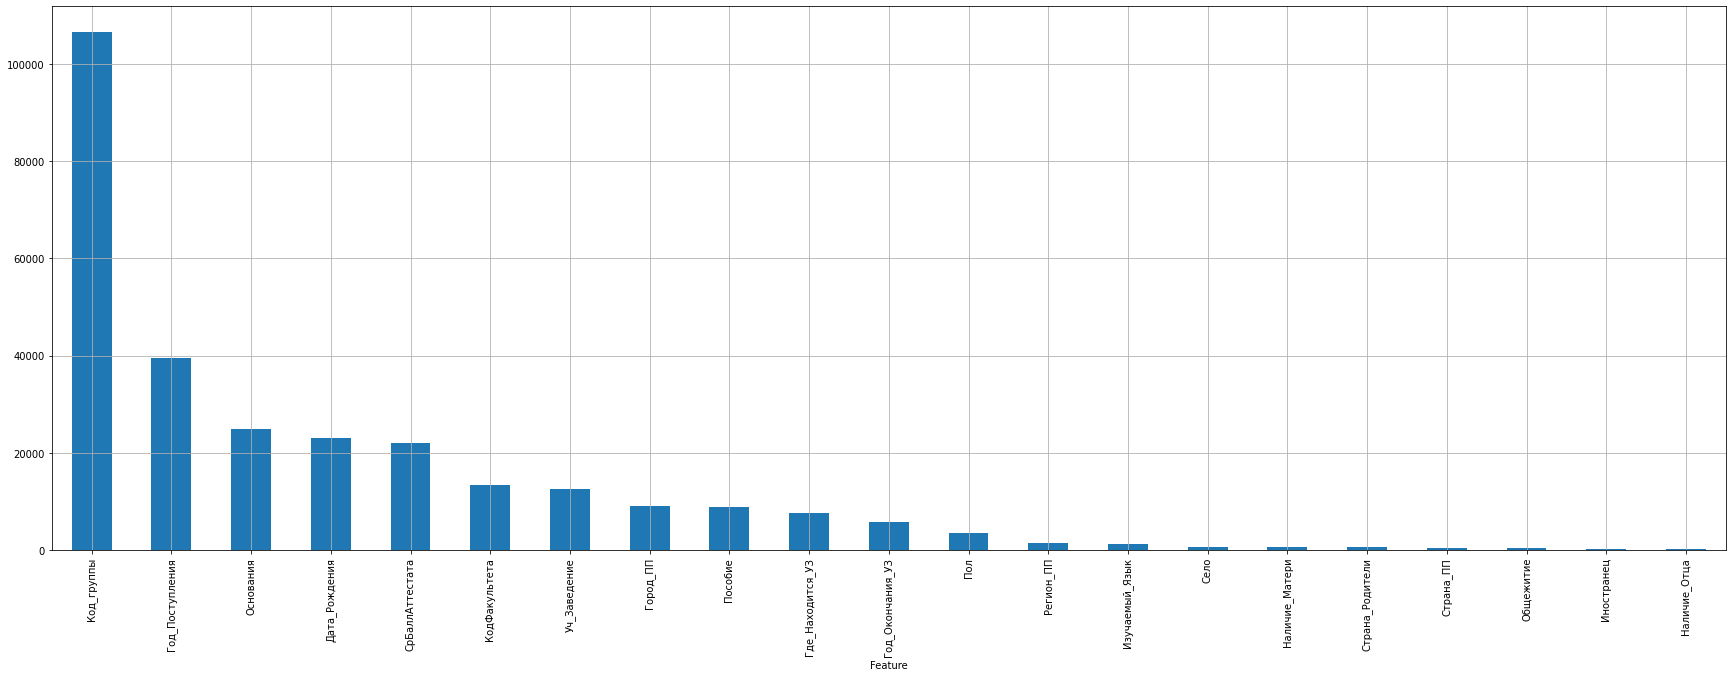

In [ ]:
%%time

fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [ ]:
automl.collect_used_feats()

['Село',
 'Lvl_0_Pipe_1_Mod_2_CatBoost_prediction_0',
 'Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost_prediction_0',
 'Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM_prediction_0',
 'Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM_prediction_1',
 'Код_группы',
 'Уч_Заведение',
 'Пол',
 'Lvl_0_Pipe_0_Mod_0_LinearL2_prediction_0',
 'Основания',
 'Lvl_0_Pipe_1_Mod_0_LightGBM_prediction_0',
 'Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost_prediction_1',
 'Страна_Родители',
 'Пособие',
 'Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM_prediction_2',
 'Год_Окончания_УЗ',
 'Иностранец',
 'Общежитие',
 'Регион_ПП',
 'Дата_Рождения',
 'Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost_prediction_2',
 'Город_ПП',
 'Изучаемый_Язык',
 'КодФакультета',
 'Lvl_0_Pipe_1_Mod_2_CatBoost_prediction_2',
 'Страна_ПП',
 'Lvl_0_Pipe_0_Mod_0_LinearL2_prediction_1',
 'Где_Находится_УЗ',
 'Lvl_0_Pipe_1_Mod_0_LightGBM_prediction_1',
 'Наличие_Отца',
 'Наличие_Матери',
 'Lvl_0_Pipe_1_Mod_0_LightGBM_prediction_2',
 'Lvl_0_Pipe_0_Mod_0_LinearL2_prediction_2',
 'Lvl_0_Pipe_1_Mod_2_CatBoost_predic

In [ ]:
df_test.head()

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,...,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
ID,,,,,,,,,,,,,,,,,,,,,
64996,20608,2014,Жен,ДН,Английский язык,1995-11-03 00:00:00.000,"МБОУ ""СОШ №55""","Алтайский край, Барнаул г",2014.0,0.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,40.0,49.0
71837,20613,2015,Жен,ДН,Немецкий язык,1995-12-10 00:00:00.000,"МБОУ ""СОШ №1""","Алтайский край, Рубцовск г",2014.0,0.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,1.0,0.0,26.0,77.0
86587,21210,2018,Жен,ОО,Английский язык,1973-08-09 00:00:00.000,Алтайский государственный медицинский университет,"Алтайский край, г. Барнаул",1997.0,0.0,...,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,74.0
73673,22254,2015,Жен,ОО,Английский язык,1983-12-07 00:00:00.000,"ГОУ ВПО ""Алтайский государственный университет""","Алтайский край, Барнаул г",2006.0,0.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,53.0,57.0
54709,15040,2012,Жен,ОО,NaN,1994-05-21 00:00:00.000,NaN,NaN,NaN,0.0,...,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,55.0


In [ ]:
test_pred = automl.predict(df_test)

In [ ]:
type(test_pred)

lightautoml.dataset.np_pd_dataset.NumpyDataset

In [ ]:
test_pred.data

array([[0.9581908 , 0.02733581, 0.01447336],
       [0.97324896, 0.02356498, 0.00318608],
       [0.17224972, 0.6897216 , 0.1380286 ],
       ...,
       [0.9654225 , 0.03182799, 0.00274948],
       [0.9349098 , 0.06122333, 0.00386686],
       [0.23812021, 0.7595851 , 0.00229472]], dtype=float32)

In [ ]:
oof_pred.data

array([[1.1646777e-02, 9.8707587e-01, 1.2773215e-03],
       [9.2036736e-01, 7.8146733e-02, 1.4859436e-03],
       [9.8269105e-01, 1.5699942e-02, 1.6089863e-03],
       ...,
       [8.1441200e-01, 1.8288064e-01, 2.7073743e-03],
       [9.9780327e-01, 2.1483437e-03, 4.8382437e-05],
       [9.8123288e-01, 1.8001422e-02, 7.6564029e-04]], dtype=float32)

In [ ]:
oof_pred.target

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
automl.reader.class_mapping

{4: 0, 3: 1, -1: 2}

#  Saving submission

In [ ]:
#subm_file = "/content/drive/MyDrive/Алтай/sample_submission.csv"
submission = df_test[['ID']]#pd.read_csv(subm_file)
submission['Статус'] = np.argmax(test_pred.data, axis =1)

/tmp/ipykernel_3919000/75707048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Статус'] = np.argmax(test_pred.data, axis =1)


In [ ]:
submission['Статус'] = submission['Статус'].map({0: 4, 1: 3, 2: -1})

/tmp/ipykernel_3919000/1321874277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Статус'] = submission['Статус'].map({0: 4, 1: 3, 2: -1})


In [ ]:
submission

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,-1
4,54709,4
...,...,...
6686,74342,4
6687,54876,4
6688,66879,4
6689,64982,4


In [ ]:
from datetime import datetime
time_str = datetime.now().strftime('%d-%m-%Y_%H-%M-%S')

# Saving the submission
filename = "ALT_subm_{}".format(time_str)
if not os.path.exists("Submissions"):
    os.mkdir("Submissions")
submission.to_csv("Submissions/{}.csv".format(filename), sep=',', index=False)

In [ ]:
submission

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,-1
4,54709,4
...,...,...
6686,74342,4
6687,54876,4
6688,66879,4
6689,64982,4


# AutoML with F1

In [ ]:
task = Task('multiclass')

roles = {
    'target': TARGET_NAME,
    'drop': ['ID']
}

automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': 1, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
    general_params = {'return_all_predictions': True, 'weighted_blender_max_nonzero_coef': 0.0}
    #selection_params = {'mode': 0}
)

oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

[18:49:43] Stdout logging level is INFO3.
[18:49:43] Task: multiclass

[18:49:43] Start automl preset with listed constraints:
[18:49:43] - time: 28800.00 seconds
[18:49:43] - CPU: 8 cores
[18:49:43] - memory: 16 GB

[18:49:43] Train data shape: (13584, 24)

[18:49:44] Feats was rejected during automatic roles guess: []
[18:49:44] Layer 1 train process start. Time left 28799.25 secs


/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and wi

[18:49:44] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[18:49:44] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[18:49:44] Linear model: C = 1e-05 score = -0.6702460103260712
[18:49:45] Linear model: C = 5e-05 score = -0.553947602894005
[18:49:45] Linear model: C = 0.0001 score = -0.5100471140648162
[18:49:45] Linear model: C = 0.0005 score = -0.442750843918108
[18:49:45] Linear model: C = 0.001 score = -0.4248161022643479
[18:49:45] Linear model: C = 0.005 score = -0.39932375347206966
[18:49:45] Linear model: C = 0.01 score = -0.39407550123346063
[18:49:46] Linear model: C = 0.05 score = -0.38965178809648776
[18:49:46] Linear model: C = 0.1 score = -0.3897376835995054
[18:49:47] Linear model: C = 0.5 score = -0.3919120385829093
[18:49:47] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[18:49:47] Linear model: C = 1e-05 score = -0.6706016554956845
[18:49:47] Linear model: C = 5e-05 score = -0.5595118350016531
[18:49:47] Linear model: C =

/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/usr/local/lib/python3.8/dist-packages/lightautoml/transformers/categorical.py:1030: FutureWarning: The series.append method is deprecated and wi

[18:50:01] Selector_LightGBM fitting and predicting completed
[18:50:02] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[18:50:02] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[18:50:02] Training until validation scores don't improve for 200 rounds
[18:50:08] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[18:50:08] Training until validation scores don't improve for 200 rounds
[18:50:13] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[18:50:13] Training until validation scores don't improve for 200 rounds
[18:50:18] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[18:50:18] Training until validation scores don't improve for 200 rounds
[18:50:25] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[18:50:25] Training until validation scores don't improve for 200 rounds
[18:50:31] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.2994785013012966
[18:50:31] Lvl_0_Pipe_1_Mo

In [ ]:
# task = Task('multiclass')

# roles = {
#     'target': TARGET_NAME,
#     'drop': ['ID']
# }

# automl = TabularAutoML(
#     task = task, 
#     timeout = TIMEOUT,
#     cpu_limit = N_THREADS,
#     reader_params = {'n_jobs': 1, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
#     general_params = {'use_algos':[[]], 'return_all_predictions': True, 'weighted_blender_max_nonzero_coef': 0.0}
#     #selection_params = {'mode': 0}
# )

# oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 3)

In [ ]:
oof_pred.data.shape

(13584, 6)

In [ ]:
test_pred = automl.predict(df_test)

In [ ]:
test_pred.data.shape

(6691, 6)

In [ ]:
df_train_2 = pd.DataFrame(oof_pred.data, columns = ['lin_0','lin_1','lin_2','gbm_0','gbm_1','gbm_2'])
df_train_2[TARGET_NAME] = df_train[TARGET_NAME]
df_train_2

,lin_0,lin_1,lin_2,gbm_0,gbm_1,gbm_2,Статус
0,0.009469,0.989060,0.001472,0.017381,0.982115,0.000505,3
1,0.912180,0.086568,0.001253,0.983989,0.015538,0.000472,4
2,0.983363,0.015051,0.001586,0.981262,0.017387,0.001352,4
3,0.977737,0.019441,0.002822,0.976941,0.021022,0.002038,4
4,0.926058,0.068685,0.005257,0.956827,0.041268,0.001905,4
...,...,...,...,...,...,...,...
13579,0.004958,0.991687,0.003355,0.012598,0.983333,0.004070,3
13580,0.968615,0.028606,0.002779,0.984216,0.014286,0.001498,4
13581,0.809993,0.187934,0.002073,0.836574,0.159555,0.003872,4
13582,0.998380,0.001618,0.000002,0.995694,0.004113,0.000193,4


In [ ]:
df_test_2 = pd.DataFrame(test_pred.data, columns = ['lin_0','lin_1','lin_2','gbm_0','gbm_1','gbm_2'])
df_test_2

,lin_0,lin_1,lin_2,gbm_0,gbm_1,gbm_2
0,0.954897,0.028069,0.017034,0.966302,0.028884,0.004815
1,0.976140,0.020906,0.002955,0.964460,0.031441,0.004099
2,0.154454,0.674332,0.171214,0.273984,0.638730,0.087286
3,0.122732,0.225792,0.651476,0.145446,0.322929,0.531625
4,0.970101,0.029783,0.000116,0.981546,0.017875,0.000579
...,...,...,...,...,...,...
6686,0.986648,0.009471,0.003881,0.980643,0.015455,0.003903
6687,0.984729,0.015118,0.000153,0.985501,0.013766,0.000733
6688,0.967172,0.029795,0.003033,0.957952,0.039891,0.002157
6689,0.936893,0.058215,0.004892,0.927662,0.070599,0.001739


In [ ]:
from sklearn.metrics import f1_score

def f1_metric(y_true, y_pred, **kwargs):
    return f1_score(y_true, np.argmax(y_pred, axis = 1), average = 'macro', **kwargs)

task = Task('multiclass', loss = 'f1', metric = f1_metric)

roles = {
    'target': TARGET_NAME,
    #'drop': ['ID']
}

automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': 1, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
    general_params = {'use_algos': [['linear_l2']]}
    #selection_params = {'mode': 0}
)

oof_pred_2 = automl.fit_predict(df_train_2, roles = roles, verbose = 3)

[19:07:25] sklearn doesn't support in general case f1 and will not be used.
[19:07:25] cb doesn't support in general case f1 and will not be used.
[19:07:25] Stdout logging level is INFO3.
[19:07:25] Task: multiclass

[19:07:25] Start automl preset with listed constraints:
[19:07:25] - time: 28800.00 seconds
[19:07:25] - CPU: 8 cores
[19:07:25] - memory: 16 GB

[19:07:25] Train data shape: (13584, 7)

[19:07:25] Feats was rejected during automatic roles guess: []
[19:07:25] Layer 1 train process start. Time left 28799.70 secs
[19:07:26] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[19:07:26] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:07:26] Linear model: C = 1e-05 score = 0.25179416704840435
[19:07:26] Linear model: C = 5e-05 score = 0.7249077213385168
[19:07:26] Linear model: C = 0.0001 score = 0.7656254196060833
[19:07:26] Linear model: C = 0.0005 score = 0.7831870704227959
[19:07:26] Linear model: C = 0.001 score = 0.788570670559742
[19:07:26] Linear 

In [ ]:
test_pred = automl.predict(df_test_2)

In [ ]:
test_pred.data

(6691, 3)

In [ ]:
#subm_file = "/content/drive/MyDrive/Алтай/sample_submission.csv"
submission = df_test[['ID']]#pd.read_csv(subm_file)
submission['Статус'] = np.argmax(test_pred.data, axis =1)

/tmp/ipykernel_3919000/75707048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Статус'] = np.argmax(test_pred.data, axis =1)


In [ ]:
submission['Статус'] = submission['Статус'].map({0: 4, 1: 3, 2: -1})

/tmp/ipykernel_3919000/1321874277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Статус'] = submission['Статус'].map({0: 4, 1: 3, 2: -1})


In [ ]:
from datetime import datetime
time_str = datetime.now().strftime('%d-%m-%Y_%H-%M-%S')

# Saving the submission
filename = "ALT_subm_{}".format(time_str)
if not os.path.exists("Submissions"):
    os.mkdir("Submissions")
submission.to_csv("Submissions/{}.csv".format(filename), sep=',', index=False)

In [ ]:
submission

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,-1
4,54709,4
...,...,...
6686,74342,4
6687,54876,4
6688,66879,4
6689,64982,4


In [ ]:
sub = pd.read_csv('Submissions/ALT_subm_16-09-2022_18-14-28.csv')

In [ ]:
(sub['Статус'] == submission['Статус']).mean()

0.9783290987894186